# Trabalhando  com a AWESOMEAPI

https://docs.awesomeapi.com.br/api-de-moedas

In [2]:
import requests
import json
from datetime import datetime, timedelta

In [10]:
cotacao = requests.get('https://economia.awesomeapi.com.br/json/all')
cotacao_dic = cotacao.json()
print('Dolar {}, data de atualizacao {}'.format(cotacao_dic['USD']['bid'],cotacao_dic['USD']['create_date']))
print('Euro {}, data de atualizacao {}'.format(cotacao_dic['EUR']['bid'],cotacao_dic['EUR']['create_date']))
print('Bitcoin {}, data de atualizacao {}'.format(cotacao_dic['BTC']['bid'],cotacao_dic['BTC']['create_date']))

Dolar 5.172, data de atualizacao 2022-12-22 12:35:54
Euro 5.4799, data de atualizacao 2022-12-22 12:34:55
Bitcoin 87.058, data de atualizacao 2022-12-22 12:35:52


- verificando api USD-BRL

In [9]:
cotacao1 = requests.get('https://economia.awesomeapi.com.br/json/last/USD-BRL')
cotacao1_dic = cotacao1.json()
print(cotacao1_dic['USDBRL']['bid'],cotacao1_dic['USDBRL']['create_date'])

5.1724 2022-12-22 12:35:44


### Ultimos 30 dias

In [12]:
cotacao30 = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacao30_dic = cotacao30.json()
lista_cotacao_dolar = [float(item['bid']) for item in cotacao30_dic]
print(lista_cotacao_dolar)

[5.1724, 5.2009, 5.1996, 5.293, 5.314, 5.314, 5.313, 5.2787, 5.2938, 5.3226, 5.24, 5.24, 5.2253, 5.2048, 5.2352, 5.2809, 5.2189, 5.2189, 5.1848, 5.1851, 5.2695, 5.3654, 5.4098, 5.4098, 5.3208, 5.3591, 5.3586, 5.32, 5.3827, 5.3827]


In [17]:
hoje = datetime.now().date()
ontem = hoje - timedelta(days=1)
ultimo_perido = hoje - timedelta(days=len(lista_cotacao_dolar))

In [18]:
data = []
for i in range(30):
    if i ==0:
        data.append(hoje)
    else:
        if i > 0:
            data.append(hoje-timedelta(days=i))

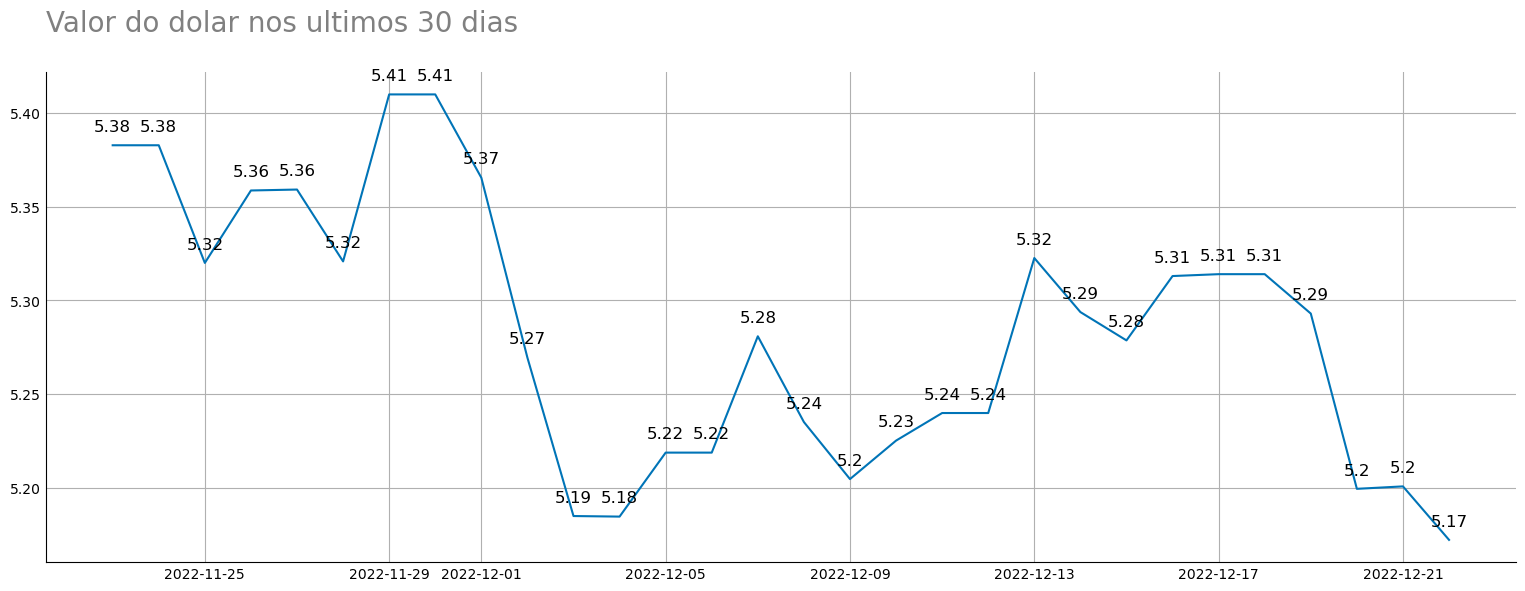

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
plt.style.use('_mpl-gallery')

y = lista_cotacao_dolar
x = data

ax.plot(x,y,color = '#0074B7')
ax.set_title('Valor do dolar nos ultimos 30 dias\n', color='Grey', size=20,loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(0,30):
    ax.annotate(round(y[i],2),(x[i],y[i]),ha="center",xytext = (0,10),textcoords = "offset points",fontsize='large')

plt.show()